<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Logistic_Regression(Part3_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 1000

data = pd.DataFrame({
    'gender': np.random.choice(['Male','Female'], n),
    'degree': np.random.choice(['BTech','BSc','BCom'], n),
    'specialization': np.random.choice(['CS','IT','ECE','Mechanical'], n),
    'cgpa': np.round(np.random.uniform(5, 9.5, n), 2),
    'internship': np.random.choice(['Yes','No'], n, p=[0.6,0.4]),
    'projects': np.random.randint(0, 6, n),
    'aptitude_score': np.random.randint(40, 100, n),
    'communication': np.random.randint(40, 100, n),
    'backlogs': np.random.randint(0, 4, n)
})

# Placement logic (realistic)
data['placed'] = (
    (data['cgpa'] > 6.5).astype(int) +
    (data['internship'] == 'Yes').astype(int) +
    (data['aptitude_score'] > 60).astype(int) +
    (data['communication'] > 60).astype(int) -
    (data['backlogs'] > 1).astype(int)
)

data['placed'] = (data['placed'] >= 3).astype(int)

# Save dataset
data.to_csv("student_placement.csv", index=False)

print(data.head())
print("\nDataset saved as student_placement.csv")


   gender degree specialization  cgpa internship  projects  aptitude_score  \
0    Male    BSc     Mechanical  6.72         No         1              41   
1  Female   BCom             CS  5.54        Yes         1              83   
2    Male  BTech             CS  9.38        Yes         2              51   
3    Male  BTech             CS  5.09        Yes         4              69   
4    Male  BTech             IT  8.32         No         5              75   

   communication  backlogs  placed  
0             52         2       0  
1             46         3       0  
2             54         3       0  
3             83         3       0  
4             66         0       1  

Dataset saved as student_placement.csv


#1) Import Libraries

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [33]:
df = pd.read_csv("student_placement.csv")

print(df.head())
print("\nShape:", df.shape)


   gender degree specialization  cgpa internship  projects  aptitude_score  \
0    Male    BSc     Mechanical  6.72         No         1              41   
1  Female   BCom             CS  5.54        Yes         1              83   
2    Male  BTech             CS  9.38        Yes         2              51   
3    Male  BTech             CS  5.09        Yes         4              69   
4    Male  BTech             IT  8.32         No         5              75   

   communication  backlogs  placed  
0             52         2       0  
1             46         3       0  
2             54         3       0  
3             83         3       0  
4             66         0       1  

Shape: (1000, 10)


#Target Variable Distribution

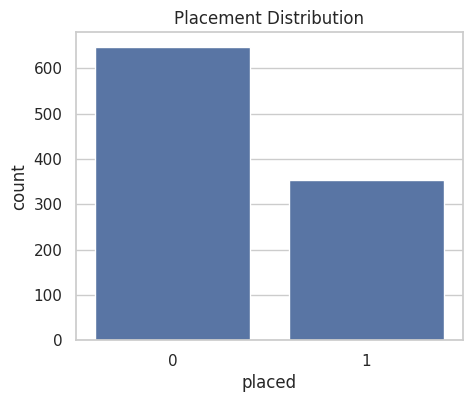

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(5,4))
sns.countplot(x='placed', data=df)
plt.title("Placement Distribution")
plt.show()


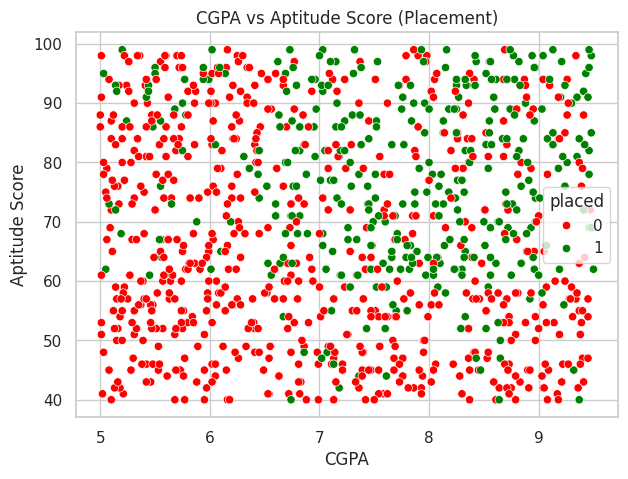

In [62]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    x='cgpa',
    y='aptitude_score',
    hue='placed',
    palette={0:'red', 1:'green'},
    data=df
)

plt.title("CGPA vs Aptitude Score (Placement)")
plt.xlabel("CGPA")
plt.ylabel("Aptitude Score")
plt.show()


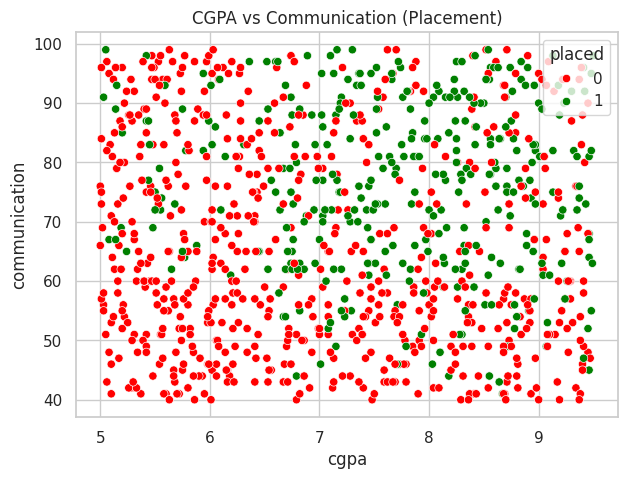

In [64]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    x='cgpa',
    y='communication',
    hue='placed',
    palette={0:'red', 1:'green'},
    data=df
)

plt.title("CGPA vs Communication (Placement)")
plt.show()


/tmp/ipython-input-1966199431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='placed', data=df, palette=['red','green'])


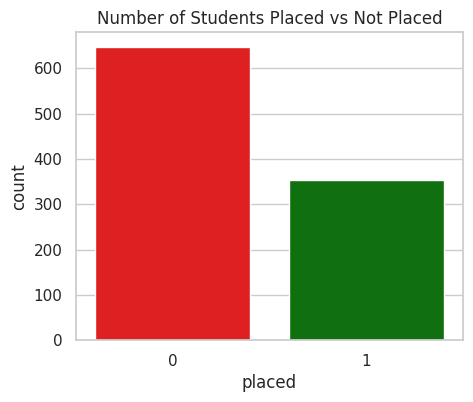

In [65]:
plt.figure(figsize=(5,4))
sns.countplot(x='placed', data=df, palette=['red','green'])
plt.title("Number of Students Placed vs Not Placed")
plt.show()


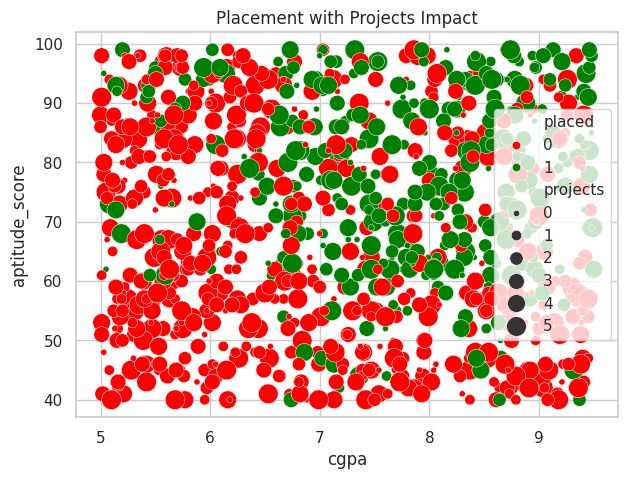

In [66]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    x='cgpa',
    y='aptitude_score',
    hue='placed',
    size='projects',
    sizes=(20,200),
    palette={0:'red', 1:'green'},
    data=df
)

plt.title("Placement with Projects Impact")
plt.show()


#Gender vs Placement

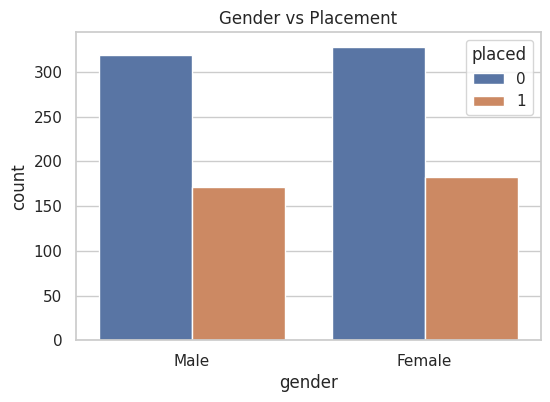

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='placed', data=df)
plt.title("Gender vs Placement")
plt.show()


#Degree vs Placement

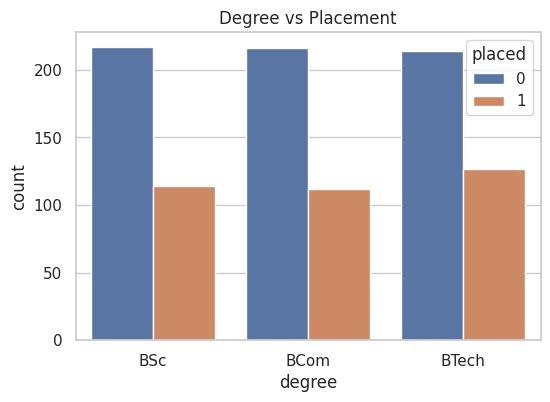

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='degree', hue='placed', data=df)
plt.title("Degree vs Placement")
plt.show()


#Internship Impact

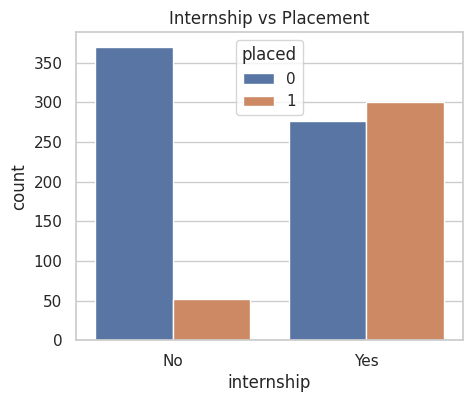

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(x='internship', hue='placed', data=df)
plt.title("Internship vs Placement")
plt.show()


#Numerical Feature Analysis
CGPA Distribution

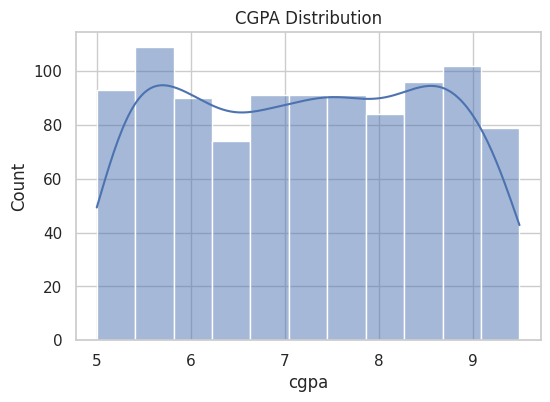

In [38]:
plt.figure(figsize=(6,4))
sns.histplot(df['cgpa'], kde=True)
plt.title("CGPA Distribution")
plt.show()


#CGPA vs Placement

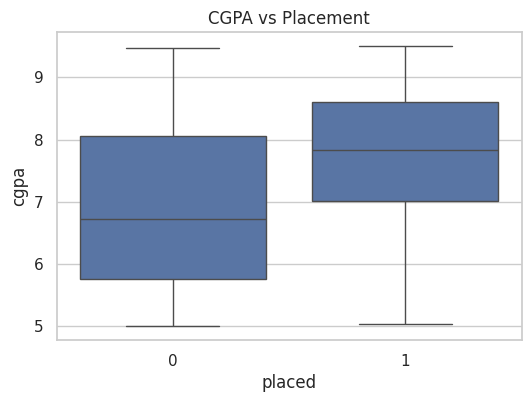

In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(x='placed', y='cgpa', data=df)
plt.title("CGPA vs Placement")
plt.show()


#Aptitude Score vs Placement

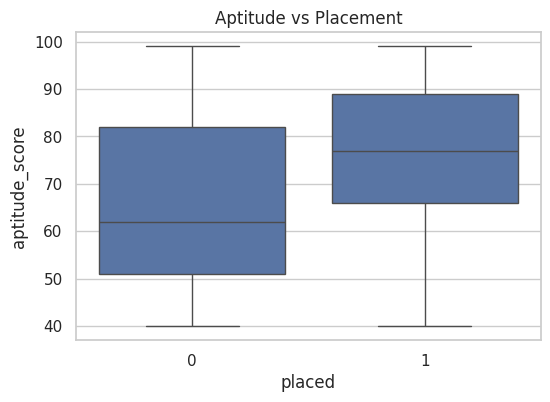

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x='placed', y='aptitude_score', data=df)
plt.title("Aptitude vs Placement")
plt.show()


#Communication vs Placement

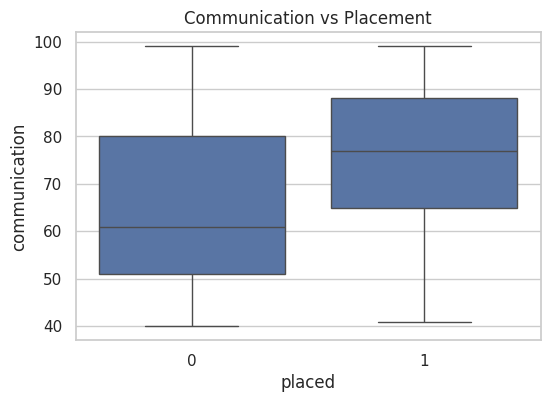

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x='placed', y='communication', data=df)
plt.title("Communication vs Placement")
plt.show()


#Backlogs Impact

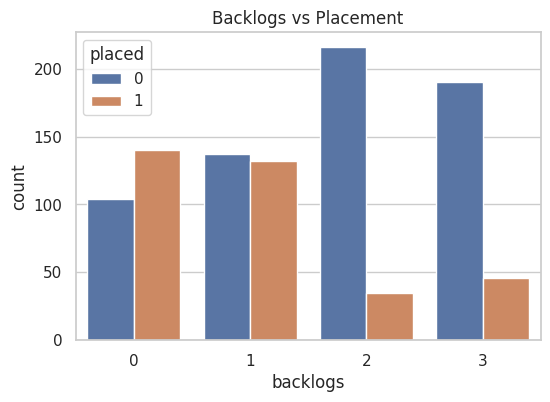

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x='backlogs', hue='placed', data=df)
plt.title("Backlogs vs Placement")
plt.show()


#Correlation Analysis

First convert categorical → numeric temporarily:

In [43]:
df_encoded = df.copy()
df_encoded['gender'] = df_encoded['gender'].map({'Male':1,'Female':0})
df_encoded['internship'] = df_encoded['internship'].map({'Yes':1,'No':0})


In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'BSc'

<Figure size 1000x600 with 0 Axes>

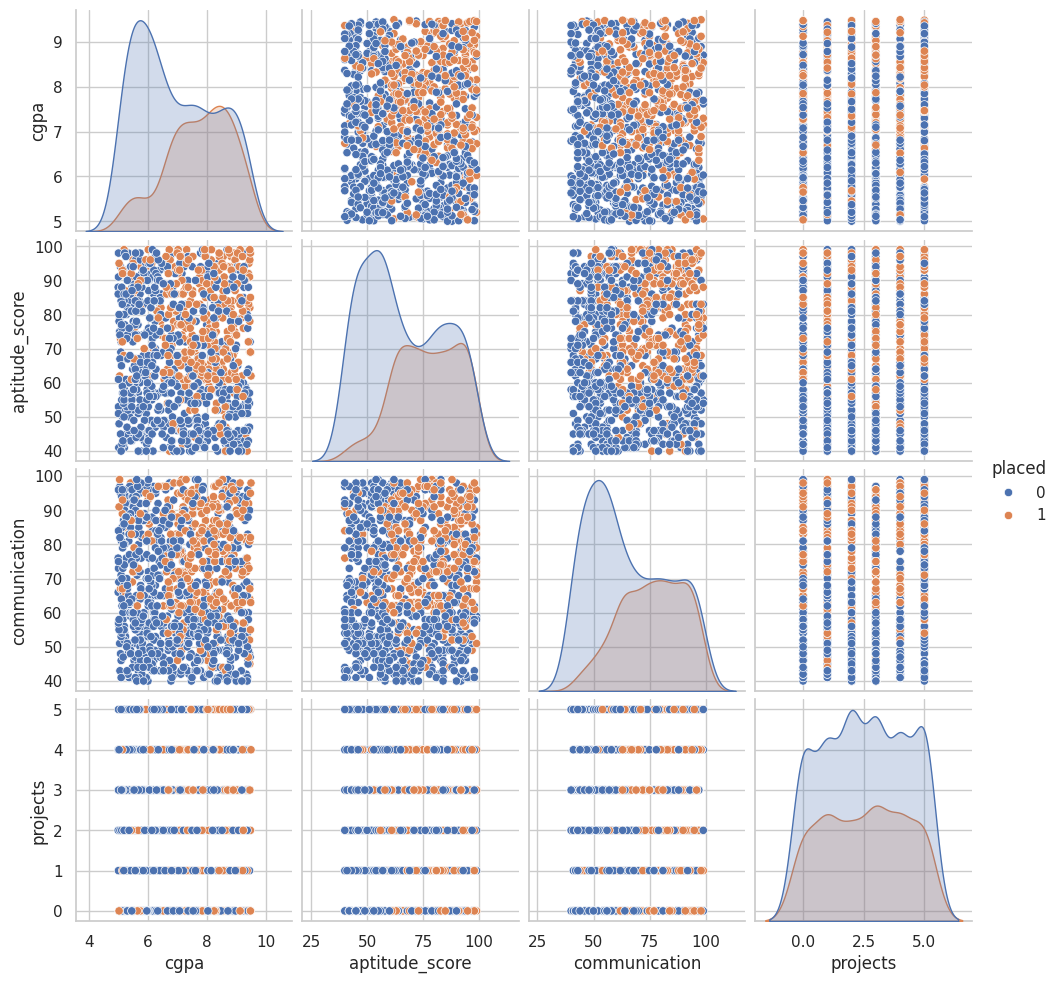

In [45]:
sns.pairplot(df[['cgpa','aptitude_score','communication','projects','placed']],
             hue='placed')
plt.show()


In [56]:
print(df.groupby('internship')['placed'].mean())


internship
No     0.123223
Yes    0.520761
Name: placed, dtype: float64


In [57]:
print(df.groupby('degree')['placed'].mean())


degree
BCom     0.341463
BSc      0.344411
BTech    0.372434
Name: placed, dtype: float64


#Outlier Detection

In [59]:
col = 'cgpa'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower) | (df[col] > upper)]

print("Lower Bound:", lower)
print("Upper Bound:", upper)
print("Number of Outliers:", outliers.shape[0])
outliers.head()

Lower Bound: 2.557500000000001
Upper Bound: 11.857499999999998
Number of Outliers: 0


,gender,degree,specialization,cgpa,internship,projects,aptitude_score,communication,backlogs,placed


In [60]:
num_cols = ['cgpa','projects','aptitude_score','communication','backlogs']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"{col}: {outliers.shape[0]} outliers")


cgpa: 0 outliers
projects: 0 outliers
aptitude_score: 0 outliers
communication: 0 outliers
backlogs: 0 outliers


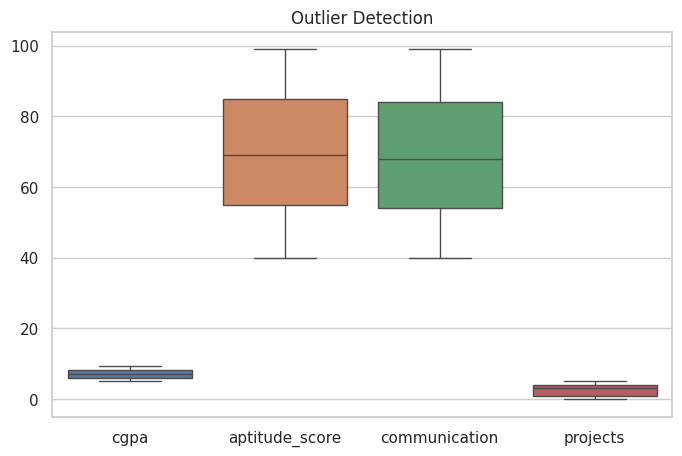

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['cgpa','aptitude_score','communication','projects']])
plt.title("Outlier Detection")
plt.show()


In [46]:
X = df.drop('placed', axis=1)
y = df['placed']


#Identify Column Types

In [47]:
num_cols = ['cgpa', 'projects', 'aptitude_score', 'communication', 'backlogs']
cat_cols = ['gender', 'degree', 'specialization', 'internship']


In [48]:
num_cols

['cgpa', 'projects', 'aptitude_score', 'communication', 'backlogs']

In [ ]:
cat_cols

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#ColumnTransformer (Preprocessing)

In [50]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])


#Create Full Pipeline

In [51]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])


In [52]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cgpa', 'projects',
                                                   'aptitude_score',
                                                   'communication',
                                                   'backlogs']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'degree',
                                                   'specialization',
                                                   'internship'])])),
                ('model', LogisticRegression(max_iter=1000))])

#Model Evaluation

In [53]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.855

Confusion Matrix:
 [[117  12]
 [ 17  54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       129
           1       0.82      0.76      0.79        71

    accuracy                           0.85       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.85      0.85      0.85       200



#Predict New Student

In [54]:
new_student = pd.DataFrame({
    'gender':['Male'],
    'degree':['BTech'],
    'specialization':['CS'],
    'cgpa':[7.5],
    'internship':['Yes'],
    'projects':[3],
    'aptitude_score':[70],
    'communication':[75],
    'backlogs':[0]
})

prediction = pipeline.predict(new_student)
probability = pipeline.predict_proba(new_student)

print("\nPlacement Prediction:", prediction[0])
print("Placement Probability:", probability[0][1])



Placement Prediction: 1
Placement Probability: 0.962354983227914


In [61]:
# Get feature names after preprocessing
ohe = pipeline.named_steps['prep'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(cat_cols)

all_features = num_cols + list(cat_features)

coefficients = pipeline.named_steps['model'].coef_[0]

feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:\n", feature_importance)



Feature Importance:
                       Feature  Coefficient
11             internship_Yes     3.627471
2              aptitude_score     1.475655
0                        cgpa     1.449000
3               communication     1.399380
10  specialization_Mechanical     0.217341
5                 gender_Male     0.136342
7                degree_BTech     0.125650
1                    projects    -0.025649
6                  degree_BSc    -0.107820
9           specialization_IT    -0.133769
8          specialization_ECE    -0.207040
4                    backlogs    -1.747931
